<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/b/b6/Proyecto_en_construccion.jpg" width="300px" height="100px" />


# Proyecto Módulo 2- Guía.
> Se especifican los componentes básicos que deberá tener cada proyecto. El proyecto debe ser un problema que utilice datos reales, ya sea de una empresa física real o de alguna página de internet que proporcione bases de datos confiables. Con la información obtenida, se pretende utilizar todas las herramientas vistas durante el curso para la correcta modelación y simulación del cierto problema con ciertas variables de interés.

## Reporte para aseguradoras 
> Integrantes: 
    - Andres Duarte 
    - Julio Gonzalez

### Link repositorio 
> **Hint**: Explore the command `Repositorio` [link](https://github.com/Julio99olaf/ProyectoModulo1)

###  Accidentes Reino Unido


### 1.2 Objetivos.
> #### 1.1 Objetivo general.
>  - Presentar información útil sobre los accidentes viales a una aseguradora en el Reino Unido para en base a eso, realizar el cálculo de la prima óptima
> #### 1.2 Objetivos específicos
>  - Seleccionar variables pertinentes a los asegurados, como edad del afectado y tipo de vehículo afectado en el accidente.
>  - Lograr una buena estimación de las variables elegidas.
>  - Definir qué datos son para un seguro de vida, de autmóvil o de gastos médicos.


### 1.3 Definición del problema. Julio

En este proyecto se plantea el problema a una aseguradora en el Reino Unido, en donde le presentaremos una simulación de los accidentes para el próximo año, donde tomaremos una variable independiente que en nuestro caso será el clima. Nuestro hipotesis es que dependiendo el clima que hay en las ciudades es el número de accidentes que ocurren en la región. En las simulaciones veremos que dependiente el tiempo de clima que haya, veremos qué tipo de vehículos que son los afectados, edad de las personas afectadas, y de quien es el vehículo más afectado. 
De esta forma la plantearemos estos escenarios a las asegundaras para que puedan planear un plan de seguro adecuado para así minimizar gastos y poder anticiparlos. 
Tenemos el hipo tesis que en clima lluvioso es cuando mayormente ocurren los accidentes. De comprobar la hipoteis las aseguradoras deberán estar prevenidas para poder costear los gastos de los accidentes en época de lluvia. También veremos escenarios para ver qué edad tienen las personas más afectadas en los accidentes para los seguros de vida se adecuan ante dicho problema. 
De esta forma vemos varias situaciones en donde podemos implementar los aprendizajes en clase para poder estimar los escenarios futuros para que las aseguradoras puedan prevenir los gastos en base a los datos históricos del año anterior.

### 1.4 Nodos y variables que se decidieron simular y porqué


Nosotros simularemos el clima, la edad de los afectados, tipo de vehículo afectado, y quién de el vehículo fue afectado (conductor, pasajero o si no hay vehículo, peatón).
Iremos  dejando fijas diferentes variables a lo largo de nuestras simulaciones para ver cómo se comportan unas en base a que las otras estén estáticas. La idea es diseñar seguros en base a probabilidades, entonces veremos diferentes condiciones. Podemos dejar fijo el clima y ver qué edades son más propensas a estar involucradas en un accidente, o dejar fijas las demás variables y ver si es más probable que los accidentados hayan ido en motocicleta. Estas diferentes simulaciones nos darán una idea de quién es más probable que se accidente, o de qué zonas geográficas (las que tengan el clima donde sucedan la mayor parte de los accidentes), es donde habrán más accidentes, por decir algo.

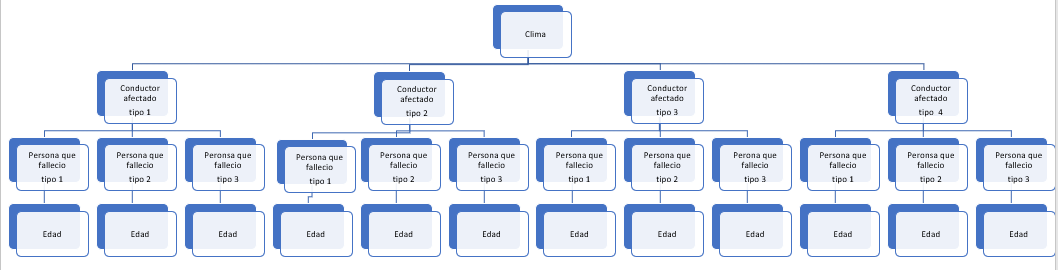

In [131]:
from IPython.display import Image
Image("Diagrama nodo.png")

### 1.5 Definición de hipótesis y supuestos.

Supuestos:
- Los accidentes son independientes, cada uno sucedió por separado, se da por hecho que no se están mostrando diferentes partes del mismo accidente como accidentes separados.
- Como tenemos muchas muestras, trataremos de tomar o aproximar la distribución de los datos a una normal

Hipótesis:
- De los climas adversos, la lluvia representa una mayor probabilidad de tener un accidente.
- Los conductores de automóvil de menor edad, son los más accidentados
- El uso de motocicleta tiene un mayor riesgo de accidentarse asociado

### 1.6 Obtención de bases de datos


Nostros sacamos el data set de la página de bases de datos del gobierno de Reino Unido, en la que había una opción para filtrar los datos en base a lo que buscaras. Escogimos las 4 variables mencionadas arriba y las filtramos para que nos diera directamente un csv con lo que vamos a analizar. Agarramos el año 2019 para realizar nuestras simulaciones. 

En un reporte publicado por el departamento de transporte del Reino Unido, venía el número de afectados por choques en 2019, teníamos estadísticas condensadas. Las estadísticas no incluyen accidentes en propiedad privada ni accidentes con afectaciones por daño solamente. Este artículo está relacionado con el data set que vamos a utilizar y nos puede servir como guía para ver las variables y el comportamiento de los accidentes en general, desde antes de empezar a limpiar nuestros datos.


In [132]:
#Libreiras 
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [133]:
#Definimos una función para analizar los datos que tenemos y darnos una idea de los mismos. (Data Quality Report)
def dqr(data): #Data Quality Report
        #%%Lista de variables de la base de datos
        import pandas as pd
        columns = pd.DataFrame(list(data.columns.values),
                               columns = ["Nombres"],
                               index= list(data.columns.values))
        #%%Lista de tipos de datos
        data_types = pd.DataFrame(data.dtypes,columns = ["Data_Types"])
        #%%Lista de tipos de datos perdidos
        missing_values = pd.DataFrame(data.isnull().sum(),
                                      columns = ["Missing_Values"])
        #%%Lista de datos presentes
        present_values = pd.DataFrame(data.count(),
                                      columns = ["Present_Values"])
        #%%Lista de valores unicos
        unique_values = pd.DataFrame(columns = ["Unique_Values"])
        for col in list(data.columns.values):
            unique_values.loc[col] = [data[col].nunique()]
        #%% lista de valores mínimos
        min_values = pd.DataFrame(columns =["Min"])
        for col in list(data.columns.values):
            try:
                min_values.loc[col] = [data[col].min()]
            except:
                pass
        #%% lista de valores máximos
        max_values = pd.DataFrame(columns =["Max"])
        
        
        for col in list(data.columns.values):
            try:
                max_values.loc[col] = [data[col].max()]
            except:
                pass
        #%% Juntar todas las tablas
        return columns.join(data_types).join(missing_values).join(present_values).join(unique_values).join(min_values).join(max_values)
    # Reemplazar texto
def replace_text(x,to_replace,replacement):
    try:
        x = x.replace(to_replace,replacement)
    except:
        pass
    return x

In [134]:
def Gen_distr_discreta(U:'vector de números aleatorios',
                       p_acum: 'P.Acumulada de la distribución a generar'):
    '''Tener en cuenta que este arreglo cuenta números empezando del 0'''
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(N))))
    return v

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            xlabel:'eje x',
                            ylabel:'eje y',
                            title:'Título gráfica'):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion))) 
    plt.bar(list(set(distribucion)),y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='u', **kwargs)
    return kde.pdf(x_grid)

def muestreo_est(B: 'Número de estratos'):
    '''Esta función realiza el método de muestro estratíficado para un número de estratos dados'''
    u= np.random.uniform(B) #generar B valores aleatorios con distribución uniforme
    i=np.arange(0,B) 
    v = (u+i)/B #aplicar estratificación
    return v

In [135]:
# Importar pandas
import pandas as pd
# Importar los datos
tips_data = 'accidents_all.csv'
tipsd=pd.read_csv(tips_data)
# Utilizar el método head() para ver las primeras 5 filas de los datos
tipsd.head()

,Accident year,Road user,Casualty class,Casualty age,Weather condition,All casualties
0,2019,Pedestrian,Pedestrian,Unknown or missing,Unknown,60
1,2019,Pedestrian,Pedestrian,Unknown or missing,Fine no high winds,283
2,2019,Pedestrian,Pedestrian,Unknown or missing,Raining no high winds,37
3,2019,Pedestrian,Pedestrian,Unknown or missing,Snowing no high winds,1
4,2019,Pedestrian,Pedestrian,Unknown or missing,Fine + high winds,2


In [136]:
reporte = dqr(tipsd)
reporte

,Nombres,Data_Types,Missing_Values,Present_Values,Unique_Values,Min,Max
Accident year,Accident year,int64,0,4314,1,2019,2019
Road user,Road user,object,0,4314,8,Bus or coach,Van / Goods 3.5 tonnes mgw or under
Casualty class,Casualty class,object,0,4314,3,Driver or rider,Pedestrian
Casualty age,Casualty age,object,0,4314,103,0,Unknown or missing
Weather condition,Weather condition,object,0,4314,9,Fine + high winds,Unknown
All casualties,All casualties,int64,0,4314,339,1,1253


Este reporte nos indica que contamos con todos los datos de nuestras vaiables, que nuestra variable de road user cuenta con 8 varaibles diferentes que son 8 diferentes tipos de vehiculos, despues vemos que nuestra variable de casualty class tiene tres diferentes valores las cuales nos indica que solo hay tres tipos de personas afectada que iban en el vehiculo y tenemos 103 edades diferentes 

## Nodo 1 (Clima)

- Para empezar con nuestro proyecto analizaremos nuestra variable independiente que es el clima donde primero analizaremos cuales son los diferentes tipos de clima que presenta nuesto problema .


In [137]:
tipsd.iloc[:,4].unique()

array(['Unknown', 'Fine no high winds', 'Raining no high winds',
       'Snowing no high winds', 'Fine + high winds',
       'Raining + high winds', 'Other', 'Fog or mist',
       'Snowing + high winds'], dtype=object)

- Podemos ver que tenemos 9 climas diferentes en donde se nos presetan un clima "Unkown" y "Other" los cuales los tomaremos como un clima desconocido o que no se tuvo registro de ellos

Para mayor practicidad en el manejo de los datos sustituiremos los valores del clima por numeros, la cual nos quedaria de la siguiente manera: 
- Unknown = 0
- Fine no high winds = 1
- Raining no high winds = 2
- Snowing no high winds = 3
- Fine + high winds = 4
- Raining + high winds = 5
- Other = 0
- Fog or mist = 6
- Snowing + high winds = 7

Donde Unknown y other lo tomaremos como una misma varibale ya que no se conoce el tipo de clima que habia en esos accidentes. 

In [138]:
tipsd=tipsd.rename(columns = {"Weather condition":"Weather_condition"})
tipsd.Weather_condition= tipsd.Weather_condition.apply(replace_text,args=('Unknown','0'))
tipsd.Weather_condition= tipsd.Weather_condition.apply(replace_text,args=('Other','0'))
tipsd.Weather_condition= tipsd.Weather_condition.apply(replace_text,args=('Fine no high winds','1'))
tipsd.Weather_condition= tipsd.Weather_condition.apply(replace_text,args=('Raining no high winds','2'))
tipsd.Weather_condition= tipsd.Weather_condition.apply(replace_text,args=('Snowing no high winds','3'))
tipsd.Weather_condition= tipsd.Weather_condition.apply(replace_text,args=('Fine + high winds','4'))
tipsd.Weather_condition= tipsd.Weather_condition.apply(replace_text,args=('Raining + high winds','5'))
tipsd.Weather_condition= tipsd.Weather_condition.apply(replace_text,args=('Fog or mist','6'))
tipsd.Weather_condition= tipsd.Weather_condition.apply(replace_text,args=('Snowing + high winds','7'))
tipsd.Weather_condition = pd.to_numeric(tipsd.Weather_condition)
tipsd

,Accident year,Road user,Casualty class,Casualty age,Weather_condition,All casualties
0,2019,Pedestrian,Pedestrian,Unknown or missing,0,60
1,2019,Pedestrian,Pedestrian,Unknown or missing,1,283
2,2019,Pedestrian,Pedestrian,Unknown or missing,2,37
3,2019,Pedestrian,Pedestrian,Unknown or missing,3,1
4,2019,Pedestrian,Pedestrian,Unknown or missing,4,2
...,...,...,...,...,...,...
4309,2019,Other vehicle,Passenger,75,1,2
4310,2019,Other vehicle,Passenger,79,1,2
4311,2019,Other vehicle,Passenger,80,1,1
4312,2019,Other vehicle,Passenger,85,2,1


In [139]:
tipsdclim = np.array(tipsd.iloc[:,4])
tipsdclim

array([0, 1, 2, ..., 1, 2, 1], dtype=int64)

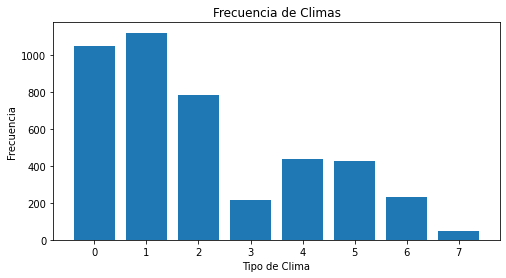

In [140]:
plot_histogram_discrete(tipsdclim,'Tipo de Clima', 'Frecuencia', 'Frecuencia de Climas')

In [141]:
tipoclim = np.unique(tipsdclim, return_counts=True)[0]
freqclim = np.unique(tipsdclim, return_counts=True)[1]
probclim = freqclim/len(tipsdclim)
probclim

array([0.2431618 , 0.25985165, 0.18196569, 0.05030134, 0.10176171,
       0.09851646, 0.05354659, 0.01089476])

<BarContainer object of 8 artists>

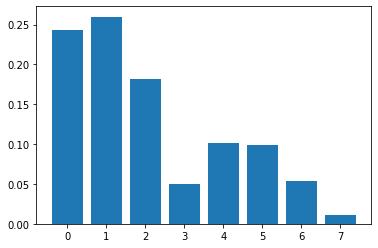

In [142]:
plt.bar(tipoclim,probclim)

In [143]:
xclim = np.arange(0,8)
xclim

array([0, 1, 2, 3, 4, 5, 6, 7])

### Utilizamos Kernel
#### - Vamos a generar números aleatorios que distribuyan de la misma forma que nuestra distribución de Probabilidad de Clima

C:\Users\julio\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernel_density.py:161: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


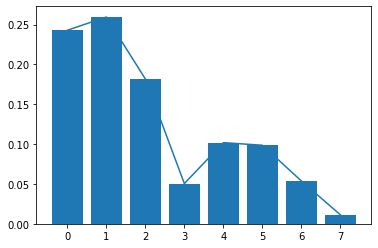

In [144]:
kernelclim = kde_statsmodels_m(tipsdclim, xclim, bandwidth=0.2)

plt.bar(tipoclim,probclim)
plt.plot(xclim, kernelclim)
plt.show()

### Sacar probabilidad acumulada

In [145]:
prob_acum=probclim.cumsum()
prob_acum

array([0.2431618 , 0.50301344, 0.68497914, 0.73528048, 0.83704219,
       0.93555865, 0.98910524, 1.        ])

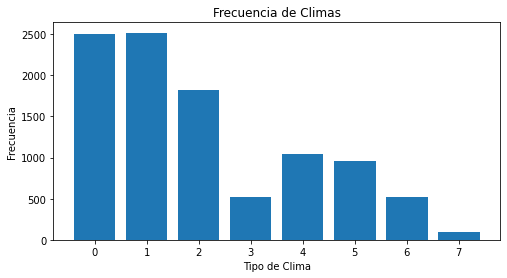

In [146]:
N = 10**4
clim_u = np.random.rand(N)
v = Gen_distr_discreta(clim_u, prob_acum)

plot_histogram_discrete(v, 'Tipo de Clima', 'Frecuencia', 'Frecuencia de Climas')

In [147]:
miu = [tipoclim[i]*probclim[i] for i in range(len(freqclim))]
miu = np.sum(miu)
miu

2.0718590635141396

### Reducción de Varianza en nuestra distribución

In [148]:
#Estratificado
N = 10**4
u = muestreo_est(N)
funcion = lambda u: Gen_distr_discreta(u, prob_acum)+1
media = np.mean(funcion(u))
media

3.9974

In [149]:
#Método Complementarios
aleat = np.random.rand(N)
aleat_comp = 1- aleat
a = funcion(aleat)
a1 = funcion(aleat_comp)
mediacomp = (a.mean() + a1.mean())/2
mediacomp

3.0644

### Al nosotros estar trabajando con variables cualitativas (como lo podrían ser un tipo de clima),  podemos deducir que el clima donde se presenta el mayor número de accidentes es el 1 (Fine no high winds), por lo cual, rechazamos que el clima influya en los accidentes ocurridos en UK. Y podemos ver que al generar nosotros números aleatorios que distribuyan igual que la distribución de Probabilidad del Clima, seguimos observando que el clima sin viento y normal, es en donde ocurre la mayor parte de los accidentes. Y con base en la media de los datos nos dice que el clima con mayor número de accidentes es el 2, lo cual matemáticamente es correcto pero nosotros ya sabemos que tratamos variables cualitativas, por lo que no está bien esa media en cuanto a lo que sucede en realidad.

## Nodo 2 (Tipo de vehículo)

Despues de optener que el clima que predomina con mayor accidentes es el Fine no high winds, veremos cual es el tipo de usuario que es mas propenso al accidente con este tipo de clima y podemos ver que los diferentes tipos de usuarios son los siguientes. 

In [150]:
tipsd.iloc[:,1].unique()

array(['Pedestrian', 'Pedal cycle', 'Motorcycle',
       'Car (Includes taxis and minibus)', 'Bus or coach',
       'Van / Goods 3.5 tonnes mgw or under', 'HGV', 'Other vehicle'],
      dtype=object)

Para mayor practicidad en el manejo de los datos sustituiremos los valores del Road user por numeros, la cual nos quedaria de la siguiente manera: 

- Pedestrian = 0
- Pedal cycle = 1
- Motorcycle = 2
- Car (Includes taxis and minibus) = 3
- Bus or coach = 4
- Van / Goods 3.5 tonnes mgw or under = 5
- HGV = 6
- Other vehicle = 7

In [151]:
tipsd=tipsd[tipsd['Weather_condition']==1]
tipsd = tipsd.rename(columns = {"Road user": "Road_User"})

Acontinuacion crearemos un data set donde solo trabajaremos con el timpo de clima que predenomina en el ejercicio anterior 

In [152]:
tipsd.Road_User= tipsd.Road_User.apply(replace_text,args=('Pedestrian','0'))
tipsd.Road_User= tipsd.Road_User.apply(replace_text,args=('Pedal cycle','1'))
tipsd.Road_User= tipsd.Road_User.apply(replace_text,args=('Motorcycle','2'))
tipsd.Road_User= tipsd.Road_User.apply(replace_text,args=('Car (Includes taxis and minibus)','3'))
tipsd.Road_User= tipsd.Road_User.apply(replace_text,args=('Car 3Includes taxis and minibus)','3'))
tipsd.Road_User= tipsd.Road_User.apply(replace_text,args=('Bus or Coach','4'))
tipsd.Road_User= tipsd.Road_User.apply(replace_text,args=('Bus or coach','4'))
tipsd.Road_User= tipsd.Road_User.apply(replace_text,args=('Van / Goods 3.5 tonnes mgw or under','5'))
tipsd.Road_User= tipsd.Road_User.apply(replace_text,args=('HGV','6'))
tipsd.Road_User= tipsd.Road_User.apply(replace_text,args=('Other vehicle','7'))
tipsd.Road_User = pd.to_numeric(tipsd.Road_User)
#tipsd[tipsd["Road_User"] == "3"]
tipsd

,Accident year,Road_User,Casualty class,Casualty age,Weather_condition,All casualties
1,2019,0,Pedestrian,Unknown or missing,1,283
8,2019,0,Pedestrian,0,1,40
11,2019,0,Pedestrian,1,1,40
15,2019,0,Pedestrian,2,1,110
21,2019,0,Pedestrian,3,1,192
...,...,...,...,...,...,...
4307,2019,7,Passenger,73,1,1
4309,2019,7,Passenger,75,1,2
4310,2019,7,Passenger,79,1,2
4311,2019,7,Passenger,80,1,1


In [153]:
tipsdroad = np.array(tipsd.iloc[:,1])
tipsdroad

array([0, 0, 0, ..., 7, 7, 7], dtype=int64)

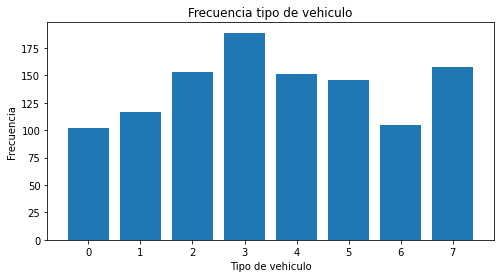

In [154]:
plot_histogram_discrete(tipsdroad,'Tipo de vehiculo', 'Frecuencia', 'Frecuencia tipo de vehiculo')

In [156]:
tiporoad = np.unique(tipsdroad, return_counts=True)[0]
freqroad = np.unique(tipsdroad, return_counts=True)[1]
probroad = freqroad/len(tipsdroad)
probroad

array([0.09099019, 0.1043711 , 0.13648528, 0.16859946, 0.13470116,
       0.13024086, 0.09366637, 0.14094558])

<BarContainer object of 8 artists>

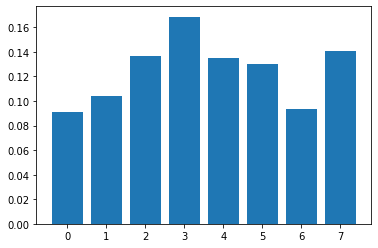

In [157]:
plt.bar(tiporoad,probroad)

In [158]:
xprob = np.arange(0,8)
xprob

array([0, 1, 2, 3, 4, 5, 6, 7])

### Kernel
- Vamos a generar números aleatorios que distribuyan de la misma forma que nuestra distribución de usuarios

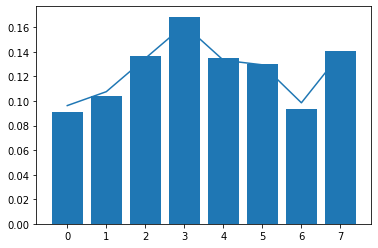

In [159]:
kernelroad = kde_statsmodels_m(tipsdroad, xprob, bandwidth=0.2)

plt.bar(tiporoad,probroad)
plt.plot(xprob, kernelroad)
plt.show()

In [160]:
prob_acum_road=probroad.cumsum()
prob_acum_road

array([0.09099019, 0.19536128, 0.33184657, 0.50044603, 0.63514719,
       0.76538805, 0.85905442, 1.        ])

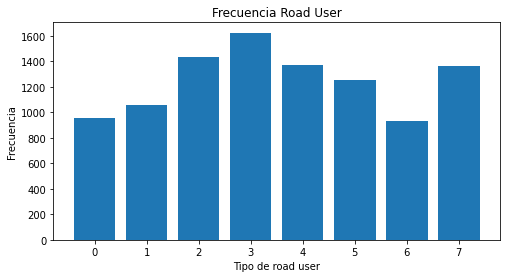

In [161]:
N = 10**4
road_u = np.random.rand(N)
v = Gen_distr_discreta(road_u, prob_acum_road)

plot_histogram_discrete(v, 'Tipo de road user', 'Frecuencia', 'Frecuencia Road User')

#### Calculamos la media de mi distribucion de probabibilidad

In [162]:
miu_road = [tiporoad[i]*probroad[i] for i in range(len(freqroad))]
miu = np.sum(miu_road)
miu

3.621766280107048

#### Estimamos las medias con los metodos de reducción de varianza 

In [164]:
#Estratificado
N = 10**4
u = muestreo_est(N)
funcion2 = lambda u: Gen_distr_discreta(u, prob_acum_road)+1
media2 = np.mean(funcion(u))
media2

3.113

In [165]:
#Método Complementarios
aleat_road = np.random.rand(N)
aleat_comp_road = 1- aleat_road
a_road = funcion(aleat_road)
a1_road = funcion(aleat_comp_road)
mediacomp_road = (a_road.mean() + a1_road.mean())/2
mediacomp_road

3.0744499999999997

### Conclusión
Podemos concluir que con base a un clima fine no hihg winds los usuarios más propesos a tener un accidente son los carros que incluyen taxis y minibus, lo cual se confirma al cualcular la media de mi distribucion de probabilidad con los metodos de reduccion de varianza. 

### 1.7 Visualización de resultados de simulación.
> Se deben simular al menos 4  "nodos" o "escenarios" en tu problema. Para la segunda entrega debes haber elaborado un programa que simule dos de ellos, los primeros dos de tu diagrama.
> Para la entrega final deben de tener los 4 nodos con todas sus simulaciones.

### 1.6 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 1.7 Referencias.

- Gov Uk. (2020). Road Safety Data . Octubre 19, 2020, de gov.uk Sitio web: https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data

-  Department for Transport. (2020). Reported road casualties in Great Britain: provisional results 2019. Octubre 19, 2020, de Department for Transport Sitio web: https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/904698/rrcgb-provisional-results-2019.pdf

___
## 2. Especificaciones adicionales.
En el grupo deben haber mínimo dos integrantes y máximo tres integrantes. Para propósitos logísticos nada más, por favor enumérense como *integrante 1*, *integrante 2* e *integrante 3*.

### 2.1 Notebook de jupyter. 
> Los anteriores numerales los deben desarrollar todos en un notebook de jupyter y llamarlo de la siguiente manera `ProyectoModulo1_ApellidoN1_ApellidoN2_ApellidoN3`, donde `ApellidoNi` hace referencia al apellido materno y la inicial del primer nombre del integrante `i`.

### 2.2 Proyecto en `GitHub`.
> El integrante 1 deberá crear un proyecto en `GitHub` llamado **proyecto_modulo1**, donde tendrán todos los archivos relacionados con el proyecto. Los demás integrantes deben hacer un *fork* del proyecto, seguir el proyecto principal con `GitKraken` y hacer al menos dos contribuciones con *pull request* (como se hizo en la tarea). En el proyecto, deben incluir el repositorio remoto del integrante 1.

### 2.3 Presentación.
> Recuerden que la nota del proyecto es mitad el trabajo, y mitad la presentación. Deben hacer una presentación ya sea en power point o utlizando un notebook de python para presentar el trabajo durante un horario de clase que se será posteriomente definido. La presentación, además de llevar todos los componentes básicos descritos en el entregable, debe llevar una tabla de contenido.
> - Presentación: 10 minutos.
> - Seguir estas recomendaciones: https://es.slideshare.net/MeireComputacion/power-point-pautas-para-una-buen-trabajo

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>